Population statistics:
Mean: 1 
SD: 1 
Median: 0.69 
Skewness: Notice how mean > median (right-skewed)

One sample (n=30) has mean: 0.83 
This is just ONE number - not a distribution yet!



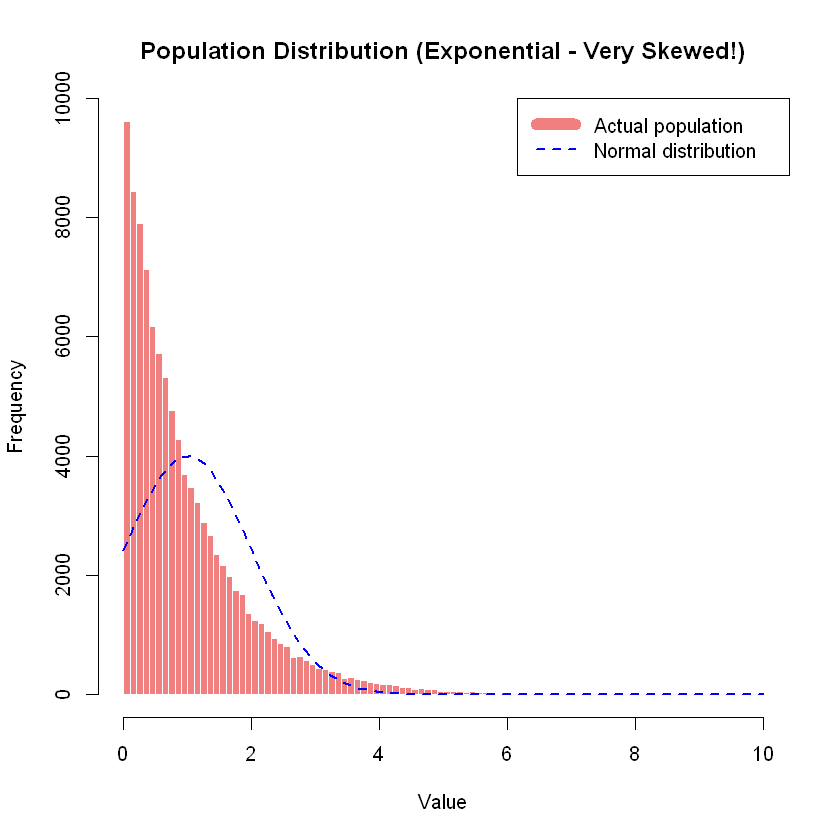

Distribution of sample means:
Mean: 0.99 
SD (Standard Error): 0.19 

NOTICE: Even though population was skewed,
        the distribution of MEANS looks normal!



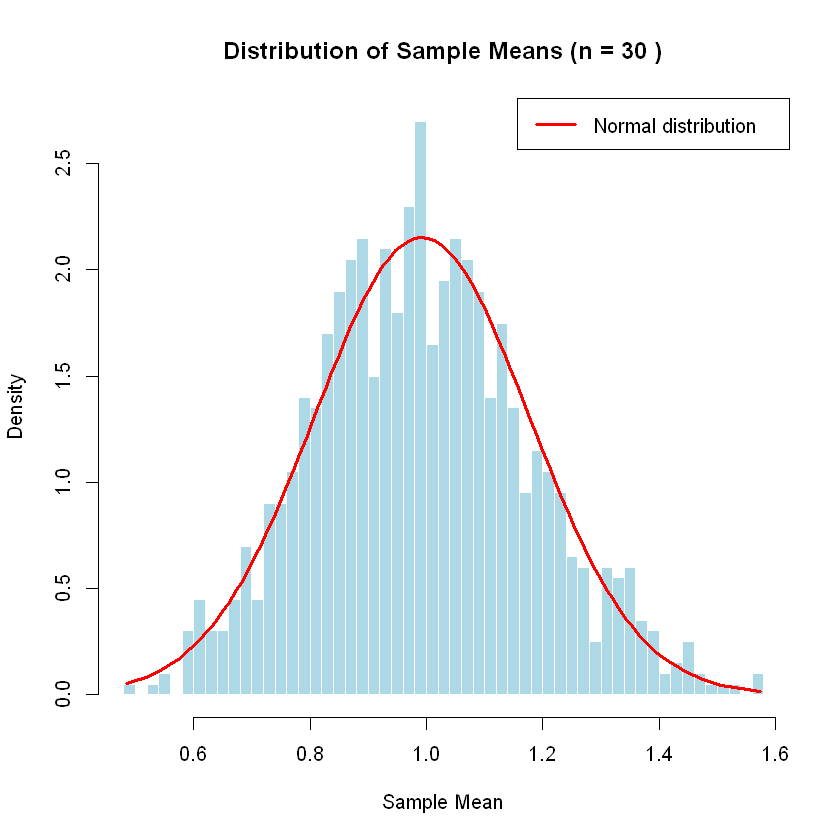

OBSERVATION: As n increases:
1. Distribution becomes MORE normal (bell-shaped)
2. Distribution becomes NARROWER (less variable)
3. Distribution centers on population mean

Standard Error by sample size:
(Comparing theoretical prediction to simulation)

n =   5:  Theoretical SE = 0.447,  Observed SE = 0.440
n =  10:  Theoretical SE = 0.316,  Observed SE = 0.315
n =  30:  Theoretical SE = 0.182,  Observed SE = 0.184
n = 100:  Theoretical SE = 0.100,  Observed SE = 0.100


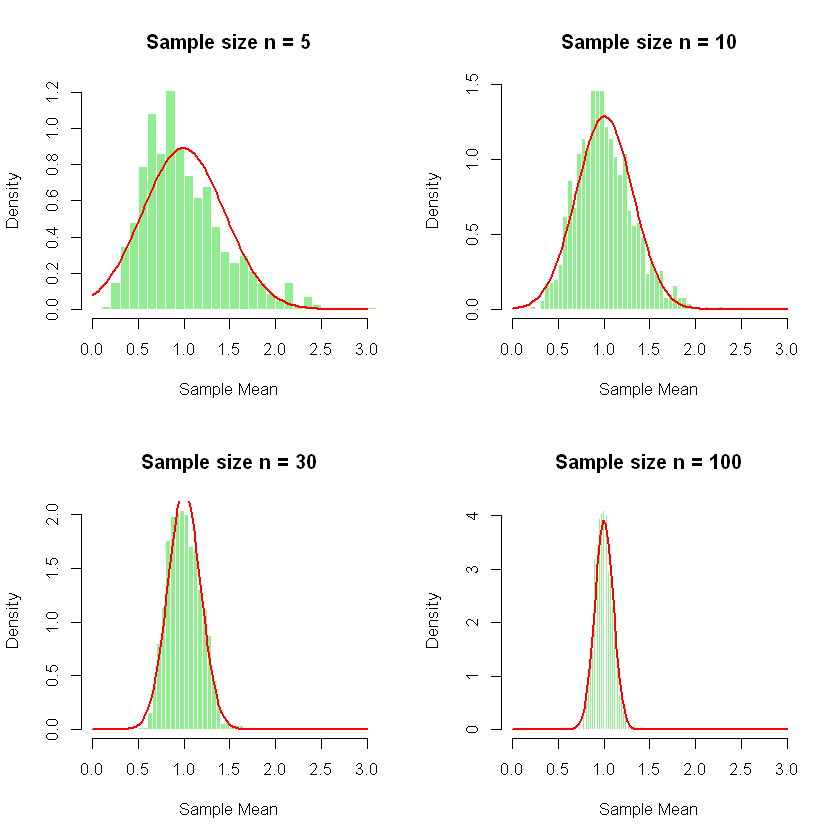



Even with a BIMODAL population, sample means are approximately normal!
This is the power of the Central Limit Theorem.



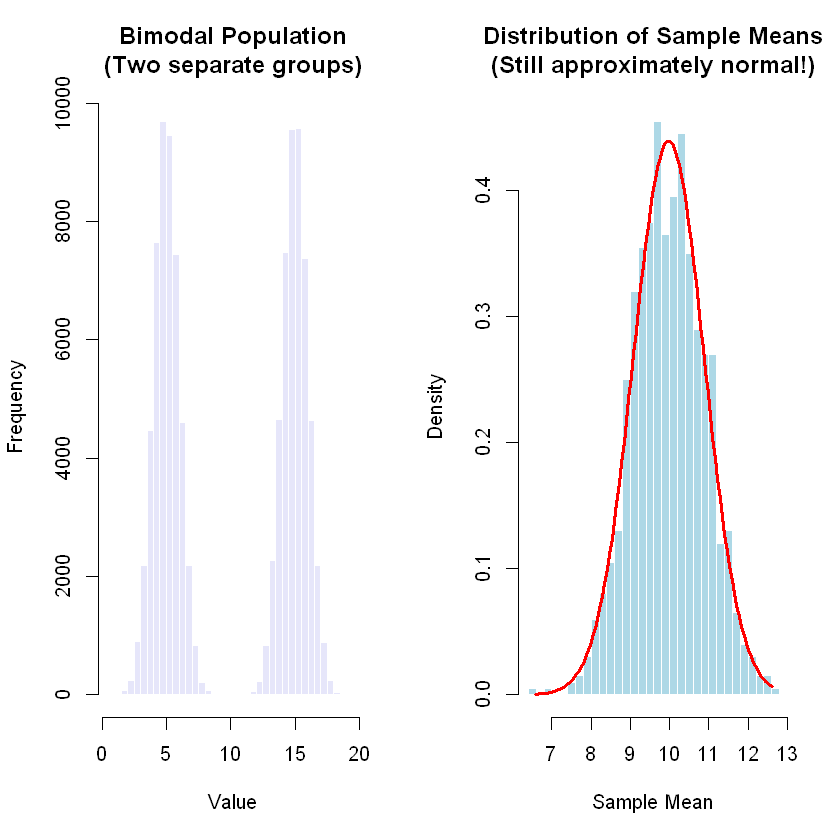

OBSERVATION: With very small n (2, 3), the approximation is rough.
Rule of thumb: CLT works well for n >= 30
(Sometimes smaller if population is already fairly normal)


WHY THE CENTRAL LIMIT THEOREM IS CRUCIAL:

1. Most biological data is NOT normally distributed
   (skewed, bounded, discrete, etc.)

2. But when we calculate MEANS (or other statistics),
   they ARE approximately normally distributed!

3. This means we can use normal-based methods for inference:
   - Confidence intervals
   - Hypothesis tests (t-tests, etc.)
   - Regression
   ...even when the original data isn't normal!

4. This is why we focus so much on the normal distribution
   in statistics courses - not because data is normal,
   but because SAMPLING DISTRIBUTIONS are!



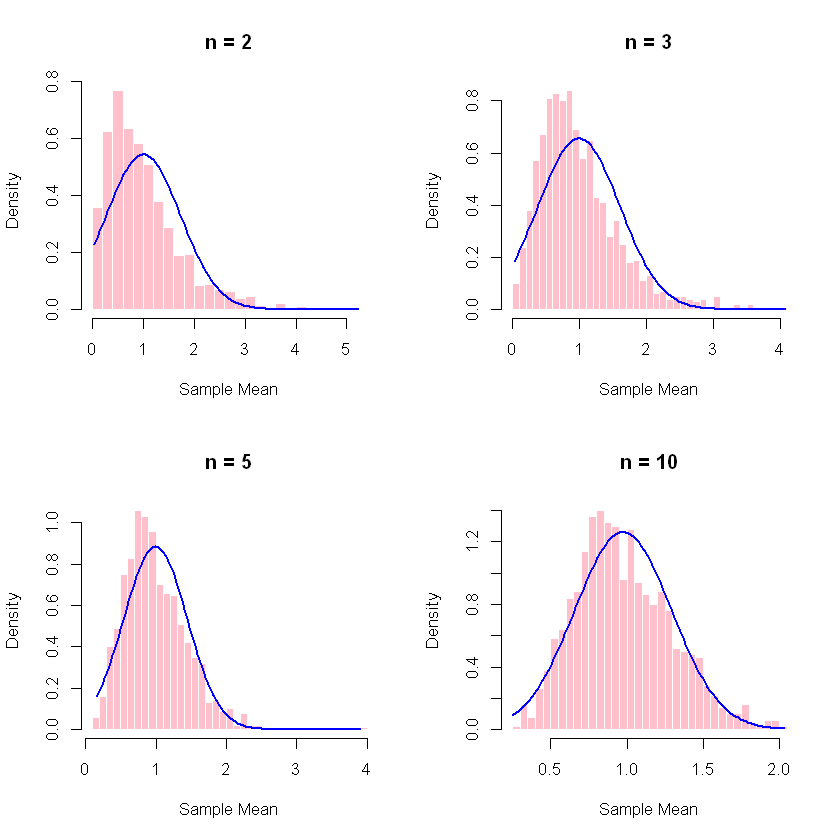

In [1]:
# =============================================================================
# Activity 4: Discovering the Central Limit Theorem
# =============================================================================
# 
# GOAL: Discover that sample MEANS are normally distributed, 
#       even when the population is NOT normal!
#
# CONCEPTS: Central Limit Theorem, sampling distributions, 
#           why we can use normal-based inference
#
# THE MAGIC: You'll see non-normal data transform into beautiful bell curves!
# =============================================================================

# -----------------------------------------------------------------------------
# PART 1: Start with a Very Non-Normal Population
# -----------------------------------------------------------------------------

set.seed(456)

# Create a VERY skewed population (exponential distribution)
# This is decidedly NOT normal!
population <- rexp(100000, rate = 1)

# Look at it
hist(population, 
     breaks = 100,
     main = "Population Distribution (Exponential - Very Skewed!)",
     xlab = "Value",
     col = "lightcoral",
     border = "white",
     xlim = c(0, 10))

cat("Population statistics:\n")
cat("Mean:", round(mean(population), 2), "\n")
cat("SD:", round(sd(population), 2), "\n")
cat("Median:", round(median(population), 2), "\n")
cat("Skewness: Notice how mean > median (right-skewed)\n\n")

# Add normal curve to show how different this is
x_seq <- seq(0, 10, length.out = 100)
normal_curve <- dnorm(x_seq, mean = mean(population), sd = sd(population))
normal_curve_scaled <- normal_curve * length(population) * 0.1  # Scale to histogram
lines(x_seq, normal_curve_scaled, col = "blue", lwd = 2, lty = 2)
legend("topright", 
       c("Actual population", "Normal distribution"), 
       col = c("lightcoral", "blue"), 
       lwd = c(10, 2),
       lty = c(1, 2))


# -----------------------------------------------------------------------------
# PART 2: Take ONE Sample and Calculate Its Mean
# -----------------------------------------------------------------------------

# If I take one sample of size n=30 and calculate the mean...
one_sample <- sample(population, size = 30)
sample_mean <- mean(one_sample)

cat("One sample (n=30) has mean:", round(sample_mean, 2), "\n")
cat("This is just ONE number - not a distribution yet!\n\n")


# -----------------------------------------------------------------------------
# PART 3: The Central Limit Theorem in Action
# -----------------------------------------------------------------------------

# But what if MANY researchers each took a sample and calculated the mean?
# Let's simulate this!

n_samples <- 1000  # Number of researchers
sample_size <- 30   # Each takes n=30 observations

# Each researcher takes one sample and calculates the mean
sampling_distribution <- numeric(n_samples)

for (i in 1:n_samples) {
  one_sample <- sample(population, size = sample_size)
  sampling_distribution[i] <- mean(one_sample)
}

# Plot the distribution of sample means
hist(sampling_distribution,
     breaks = 50,
     main = paste("Distribution of Sample Means (n =", sample_size, ")"),
     xlab = "Sample Mean",
     col = "lightblue",
     border = "white",
     probability = TRUE)

# Add a normal curve
x_seq <- seq(min(sampling_distribution), max(sampling_distribution), length.out = 100)
normal_curve <- dnorm(x_seq, 
                     mean = mean(sampling_distribution), 
                     sd = sd(sampling_distribution))
lines(x_seq, normal_curve, col = "red", lwd = 3)
legend("topright", "Normal distribution", col = "red", lwd = 3)

cat("Distribution of sample means:\n")
cat("Mean:", round(mean(sampling_distribution), 2), "\n")
cat("SD (Standard Error):", round(sd(sampling_distribution), 2), "\n\n")

cat("NOTICE: Even though population was skewed,\n")
cat("        the distribution of MEANS looks normal!\n\n")


# -----------------------------------------------------------------------------
# PART 4: Effect of Sample Size
# -----------------------------------------------------------------------------

# Let's see what happens with different sample sizes

sample_sizes <- c(5, 10, 30, 100)
par(mfrow = c(2, 2))

for (n in sample_sizes) {
  # Generate sampling distribution
  sample_means <- numeric(1000)
  
  for (i in 1:1000) {
    one_sample <- sample(population, size = n)
    sample_means[i] <- mean(one_sample)
  }
  
  # Plot
  hist(sample_means,
       breaks = 30,
       main = paste("Sample size n =", n),
       xlab = "Sample Mean",
       col = "lightgreen",
       border = "white",
       probability = TRUE,
       xlim = c(0, 3))
  
  # Add normal curve
  x_seq <- seq(0, 3, length.out = 100)
  curve(dnorm(x, mean = mean(sample_means), sd = sd(sample_means)), 
        add = TRUE, col = "red", lwd = 2)
}

par(mfrow = c(1, 1))

cat("OBSERVATION: As n increases:\n")
cat("1. Distribution becomes MORE normal (bell-shaped)\n")
cat("2. Distribution becomes NARROWER (less variable)\n")
cat("3. Distribution centers on population mean\n\n")


# -----------------------------------------------------------------------------
# PART 5: Quantify the Standard Error
# -----------------------------------------------------------------------------

# The Central Limit Theorem predicts:
# SD of sample means = population_SD / sqrt(n)
# This is called the STANDARD ERROR (SE)

pop_sd <- sd(population)

cat("Standard Error by sample size:\n")
cat("(Comparing theoretical prediction to simulation)\n\n")

for (n in sample_sizes) {
  # Simulate
  sample_means <- numeric(1000)
  for (i in 1:1000) {
    sample_means[i] <- mean(sample(population, size = n))
  }
  
  observed_se <- sd(sample_means)
  theoretical_se <- pop_sd / sqrt(n)
  
  cat(sprintf("n = %3d:  Theoretical SE = %.3f,  Observed SE = %.3f\n", 
              n, theoretical_se, observed_se))
}


# -----------------------------------------------------------------------------
# PART 6: Try with an Even Weirder Distribution
# -----------------------------------------------------------------------------

# Let's try with a BIMODAL distribution (two peaks)
weird_population <- c(rnorm(50000, mean = 5, sd = 1),
                     rnorm(50000, mean = 15, sd = 1))

par(mfrow = c(1, 2))

# Population
hist(weird_population,
     breaks = 50,
     main = "Bimodal Population\n(Two separate groups)",
     xlab = "Value",
     col = "lavender",
     border = "white")

# Sampling distribution of means
sample_means_weird <- numeric(1000)
for (i in 1:1000) {
  sample_means_weird[i] <- mean(sample(weird_population, size = 30))
}

hist(sample_means_weird,
     breaks = 30,
     main = "Distribution of Sample Means\n(Still approximately normal!)",
     xlab = "Sample Mean",
     col = "lightblue",
     border = "white",
     probability = TRUE)

# Add normal curve
x_seq <- seq(min(sample_means_weird), max(sample_means_weird), length.out = 100)
lines(x_seq, 
      dnorm(x_seq, mean = mean(sample_means_weird), sd = sd(sample_means_weird)),
      col = "red", lwd = 3)

par(mfrow = c(1, 1))

cat("\n\nEven with a BIMODAL population, sample means are approximately normal!\n")
cat("This is the power of the Central Limit Theorem.\n\n")


# -----------------------------------------------------------------------------
# PART 7: What About Very Small Samples?
# -----------------------------------------------------------------------------

# CLT says "as n increases" - but how small is too small?

sample_sizes_small <- c(2, 3, 5, 10)

par(mfrow = c(2, 2))

for (n in sample_sizes_small) {
  sample_means <- numeric(1000)
  for (i in 1:1000) {
    sample_means[i] <- mean(sample(population, size = n))
  }
  
  hist(sample_means,
       breaks = 30,
       main = paste("n =", n),
       xlab = "Sample Mean",
       col = "pink",
       border = "white",
       probability = TRUE)
  
  x_seq <- seq(min(sample_means), max(sample_means), length.out = 100)
  lines(x_seq, 
        dnorm(x_seq, mean = mean(sample_means), sd = sd(sample_means)),
        col = "blue", lwd = 2)
}

par(mfrow = c(1, 1))

cat("OBSERVATION: With very small n (2, 3), the approximation is rough.\n")
cat("Rule of thumb: CLT works well for n >= 30\n")
cat("(Sometimes smaller if population is already fairly normal)\n\n")


# -----------------------------------------------------------------------------
# PART 8: YOUR TURN - Explore!
# -----------------------------------------------------------------------------

# TODO: Try creating your own weird population distributions and see if 
#       the Central Limit Theorem still works!

# Example: Uniform distribution (flat, no peak)
# uniform_pop <- runif(100000, min = 0, max = 10)

# Example: Extremely skewed
# extreme_pop <- rexp(100000, rate = 5)

# Example: Discrete (like counting data)
# discrete_pop <- rpois(100000, lambda = 3)

# Then follow the pattern above to:
# 1. Plot the population
# 2. Take many samples of size n
# 3. Calculate mean of each sample
# 4. Plot distribution of means
# 5. See if it looks normal!


# -----------------------------------------------------------------------------
# PART 9: Why This Matters for Statistics
# -----------------------------------------------------------------------------

cat("\n=================================================================\n")
cat("WHY THE CENTRAL LIMIT THEOREM IS CRUCIAL:\n")
cat("=================================================================\n\n")

cat("1. Most biological data is NOT normally distributed\n")
cat("   (skewed, bounded, discrete, etc.)\n\n")

cat("2. But when we calculate MEANS (or other statistics),\n")
cat("   they ARE approximately normally distributed!\n\n")

cat("3. This means we can use normal-based methods for inference:\n")
cat("   - Confidence intervals\n")
cat("   - Hypothesis tests (t-tests, etc.)\n")
cat("   - Regression\n")
cat("   ...even when the original data isn't normal!\n\n")

cat("4. This is why we focus so much on the normal distribution\n")
cat("   in statistics courses - not because data is normal,\n")
cat("   but because SAMPLING DISTRIBUTIONS are!\n\n")

cat("=================================================================\n")


# -----------------------------------------------------------------------------
# DISCUSSION QUESTIONS
# -----------------------------------------------------------------------------
#
# 1. The population was exponential (very skewed). Why did the distribution
#    of sample means become normal-shaped?
#
# 2. What happened to the spread (SD) of the distribution as n increased?
#    Can you explain this with the formula SE = SD/sqrt(n)?
#
# 3. We used n=30 as "large enough". Can you think of situations where you
#    might need larger n for CLT to work well?
#
# 4. How does the CLT justify using t-tests and confidence intervals in
#    real biology research, where data is often not normally distributed?
#
# 5. What would happen if you looked at the distribution of sample MEDIANS
#    instead of means? Would they also be normal? (Try it!)
#
# 6. The CLT works for means. Does it work for other statistics like
#    variance, maximum, or range? (Advanced: try simulating!)
#
# =============================================================================